# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [98]:
# Your code here
import pandas as pd

data = pd.read_csv('PS_20174392719_1491204439457_log.csv').sample(100000)

In [99]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4618449,329,CASH_IN,339858.01,C1680351895,397238.93,737096.95,C1584737240,78412.96,0.00,0,0
5472276,379,PAYMENT,8606.47,C560413593,573683.12,565076.65,M424505115,0.00,0.00,0,0
4604590,329,CASH_OUT,322808.23,C642558442,397892.00,75083.77,C1213160165,488331.52,811139.74,0,0
3877073,283,CASH_IN,71495.68,C979467052,22892.00,94387.68,C631275518,4734742.40,4663246.73,0,0
2798613,217,TRANSFER,3194491.64,C1430947856,180234.87,0.00,C1427621020,13161939.55,16356431.19,0,0


In [100]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [101]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.564590,1.816448e+05,8.382970e+05,8.595721e+05,1.107233e+06,1.231030e+06,0.001130,0.0
std,142.130681,5.974945e+05,2.888187e+06,2.922098e+06,3.471456e+06,3.750125e+06,0.033597,0.0
min,1.000000,1.590000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.317738e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.460414e+04,1.442600e+04,0.000000e+00,1.342513e+05,2.149638e+05,0.000000,0.0
75%,337.000000,2.082301e+05,1.082580e+05,1.459057e+05,9.557206e+05,1.121108e+06,0.000000,0.0
max,722.000000,4.931644e+07,5.039905e+07,4.039905e+07,2.916677e+08,3.215898e+08,1.000000,0.0


In [102]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.026396,-0.007627,-0.007899,0.029698,0.028313,0.026574,NaN
amount,0.026396,1.000000,-0.000476,-0.006715,0.331836,0.483862,0.085732,NaN
oldbalanceOrg,-0.007627,-0.000476,1.000000,0.998685,0.069294,0.045235,0.017138,NaN
newbalanceOrig,-0.007899,-0.006715,0.998685,1.000000,0.071072,0.045212,-0.002915,NaN
oldbalanceDest,0.029698,0.331836,0.069294,0.071072,1.000000,0.980295,-0.007840,NaN
newbalanceDest,0.028313,0.483862,0.045235,0.045212,0.980295,1.000000,-0.001513,NaN
isFraud,0.026574,0.085732,0.017138,-0.002915,-0.007840,-0.001513,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

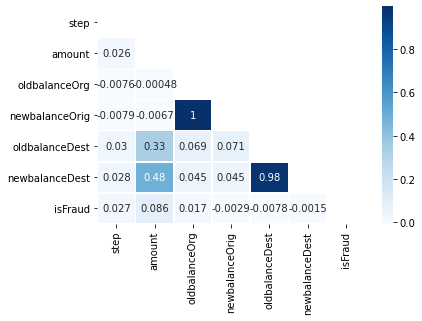

In [103]:
import seaborn as sns
import numpy as np

corr = data.drop(['isFlaggedFraud'], axis = 1).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

corr_map = sns.heatmap(corr, linewidths = 0.7, annot = True, mask = mask, cmap = 'Blues')

corr_map

In [104]:
data['isFraud'].value_counts()
#isFraud should be the target because is only 1 and 0.

0    99887
1      113
Name: isFraud, dtype: int64

### What is the distribution of the outcome? 

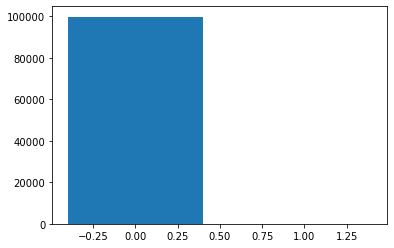

In [105]:
# Your response here
import matplotlib.pyplot as plt
data['isFraud'].value_counts().index
plt.bar(data['isFraud'].value_counts().index, data['isFraud'].value_counts())
plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [106]:
data_cleaned = data

In [107]:
# Your code here
#Step seems a good time variable, to see if there was any fraud in a time frame of 30 days.

In [108]:
#can take the names out since they are all different.
data_cleaned.drop(['nameOrig', 'nameDest','isFlaggedFraud'], inplace = True,axis = True)

In [109]:
#Correlation in newbalanceOrig-oldbalanceOrg and newbalanceDest-oldbalanceDest

#maybe take this out but I will try if it gives value data.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace = True)


In [110]:
display(data_cleaned.dtypes, data_cleaned['type'].unique())

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

array(['CASH_IN', 'PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [111]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
data_cleaned['type_encoded'] = Le.fit_transform(data_cleaned['type'])

In [112]:
display(data.dtypes,data_cleaned.dtypes)

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_encoded        int32
dtype: object

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_encoded        int32
dtype: object

In [113]:
data_cleaned.drop(['type'],axis = 1 , inplace = True)

### Run a logisitc regression classifier and evaluate its accuracy.

In [116]:
# Your code here
from sklearn.model_selection import train_test_split


X = data_cleaned.drop(['isFraud'], axis = 1)
y = data_cleaned['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
display(model.score(X_test,y_test),model.score(X_train,y_train))


0.9983

0.9983875

### Now pick a model of your choice and evaluate its accuracy.

In [127]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
display(forest_model.score(X_test,y_test),forest_model.score(X_train,y_train))

0.99955

1.0

### Which model worked better and how do you know?

In [88]:
# Your response here
#Our random forest had better accuracy but maybe is overfitting.

#We should look at the precision and recall as well to know which one is better.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.